# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [45]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
import joblib


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [46]:
# 2. Memuat Dataset
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [47]:
# Menampilkan 10 baris pertama
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0 

In [48]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
# Menampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [49]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
# Menampilkan statistik deskriptif
print(df.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

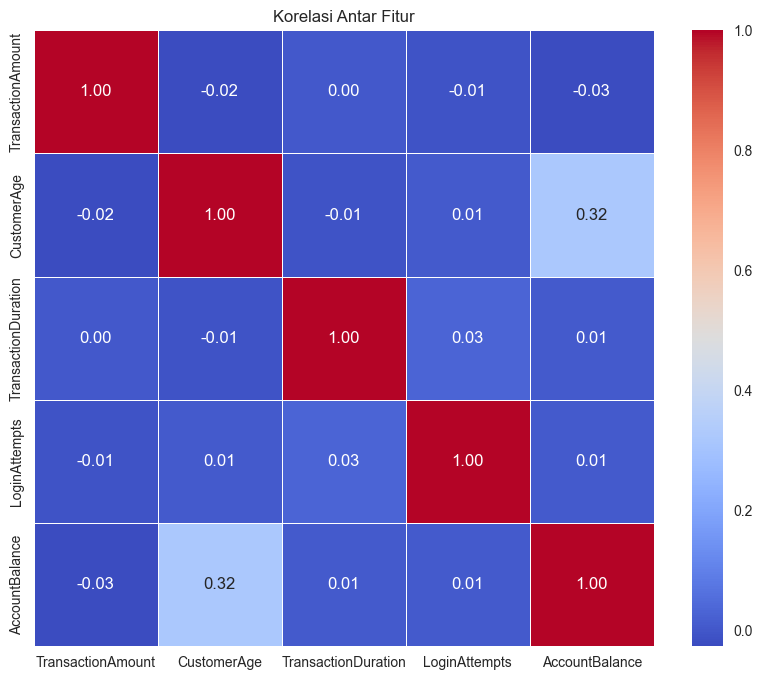

In [50]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Hitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = numeric_df.corr()

# Tampilkan heatmap untuk korelasi antar fitur
plt.figure(figsize=(10, 8))  # Menyesuaikan ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasi Antar Fitur")
plt.show()
plt.show()

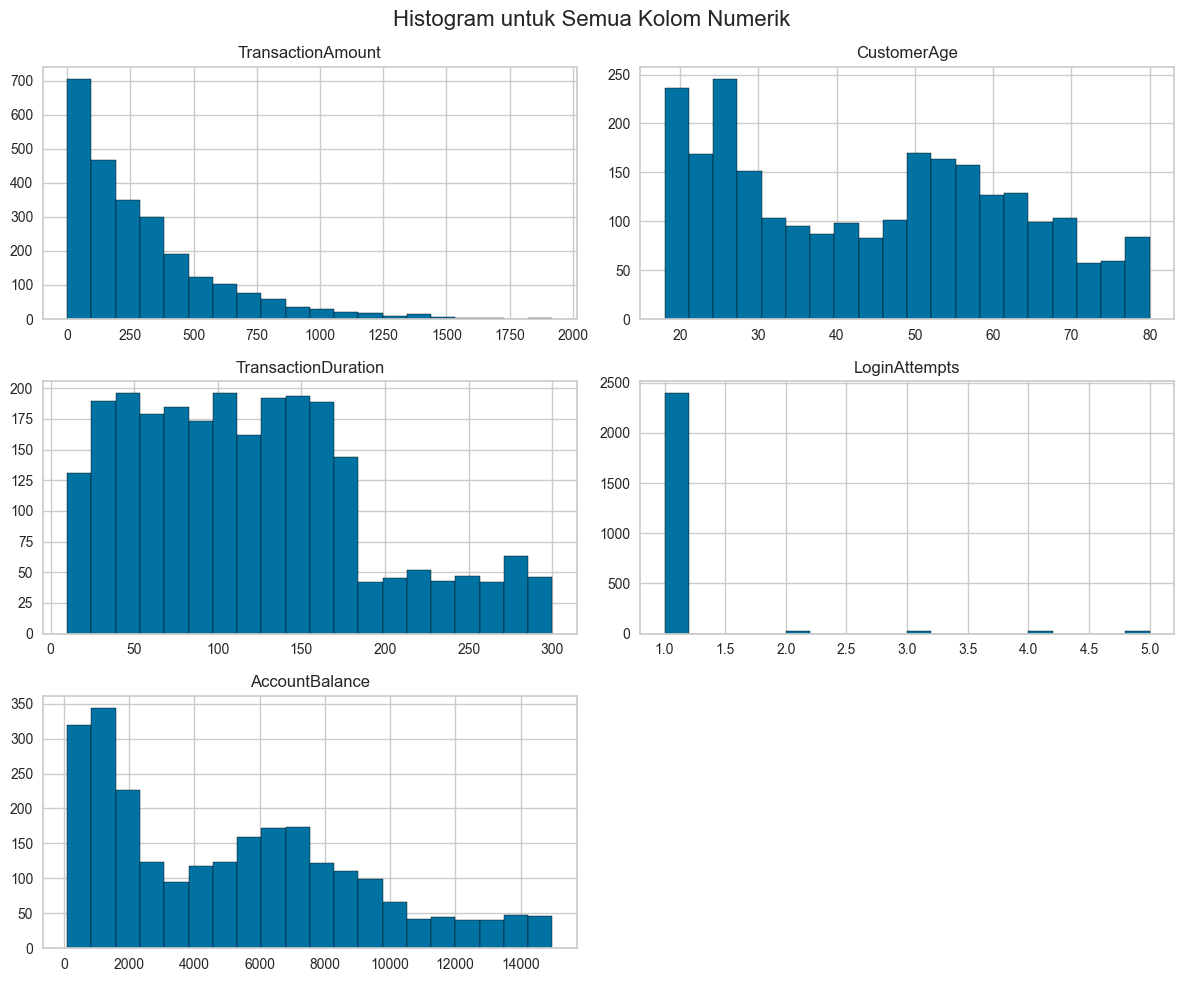

In [51]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Menampilkan histogram untuk setiap kolom numerik
numeric_df.hist(bins=20, figsize=(12, 10), edgecolor='black')  # Atur jumlah bins dan ukuran gambar
plt.suptitle('Histogram untuk Semua Kolom Numerik', fontsize=16)
plt.tight_layout()  # Agar label tidak terpotong
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

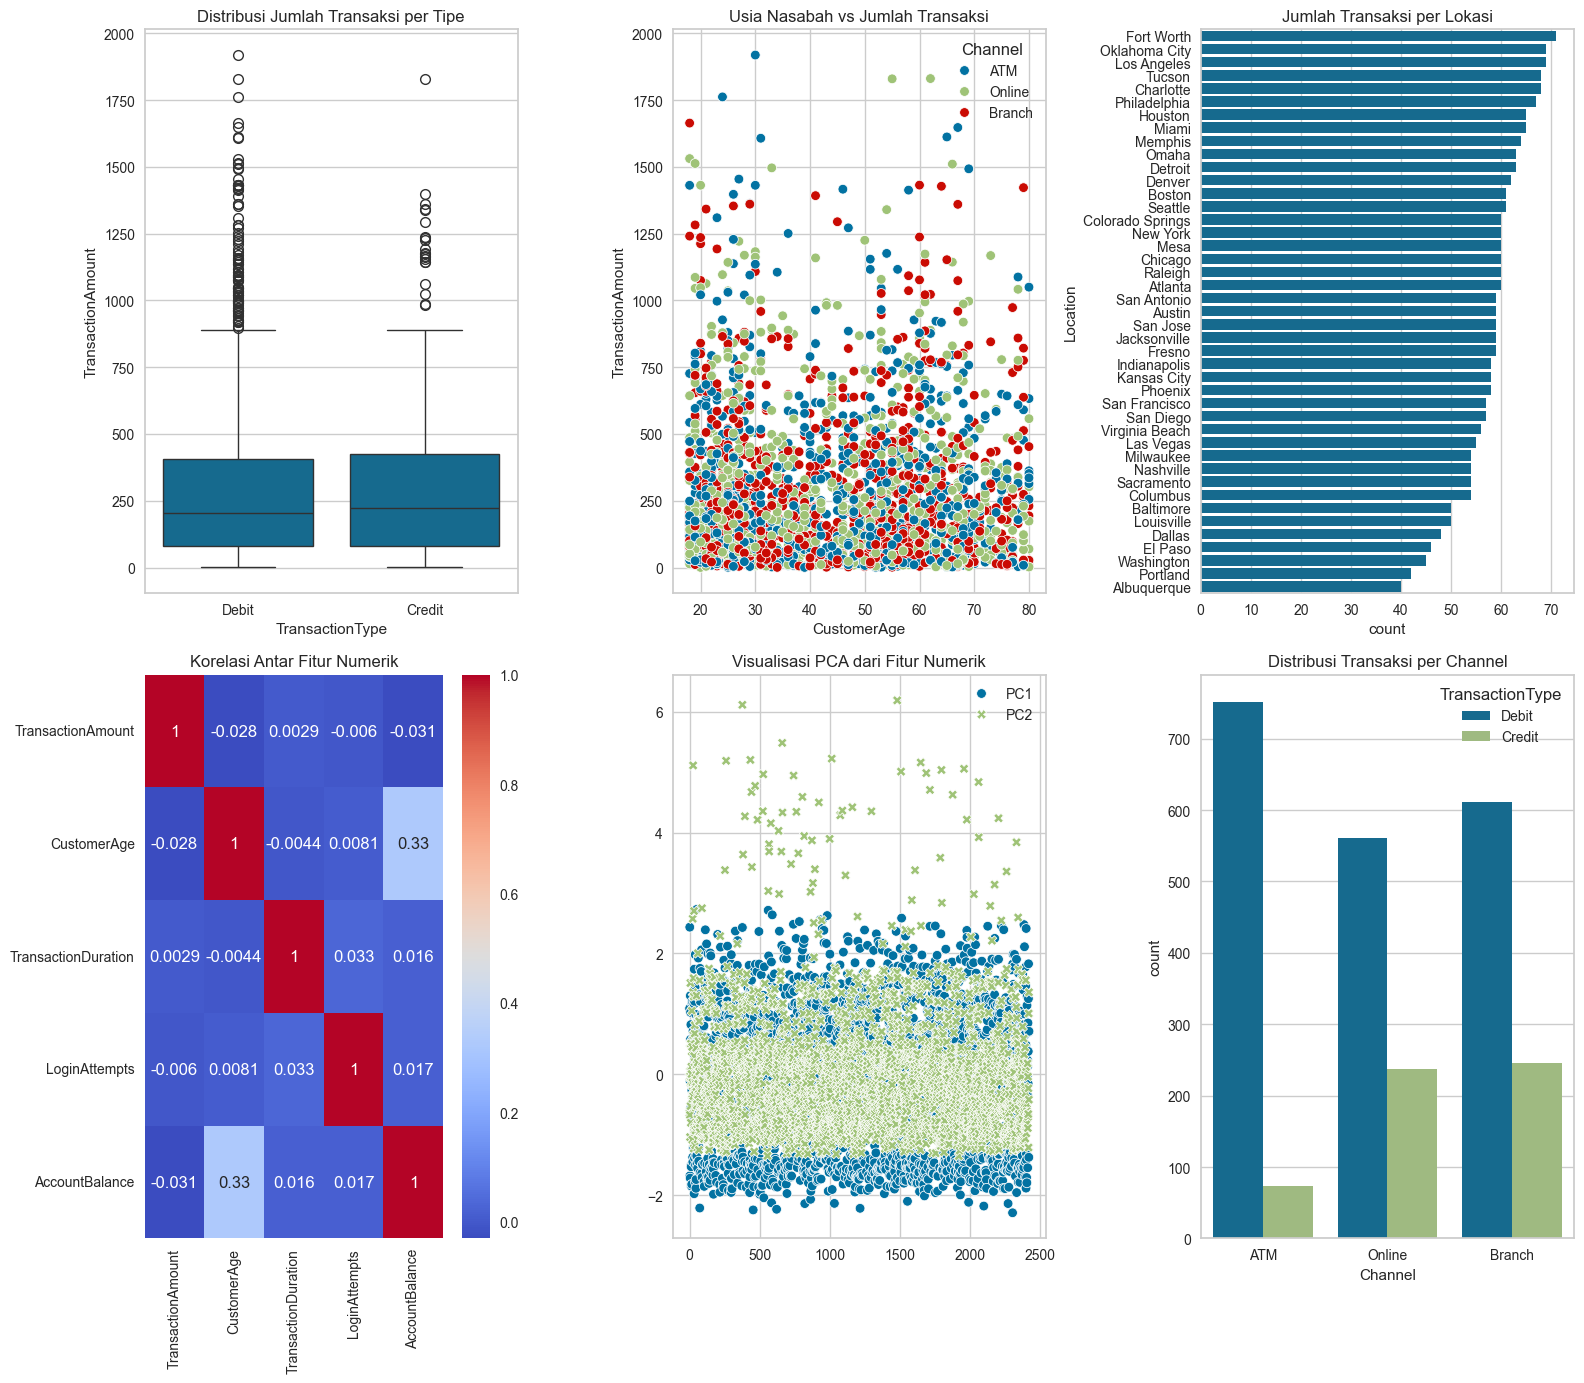

In [52]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Pilih fitur numerik
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
numeric_df = df[features].dropna()

# Set ukuran plot secara keseluruhan
plt.figure(figsize=(16, 14))

# ----------- PLOT 1: Boxplot Jumlah Transaksi per Tipe ----------- #
plt.subplot(2, 3, 1)  # 2 baris, 3 kolom, plot ke-1
sns.boxplot(data=df, x='TransactionType', y='TransactionAmount')
plt.title("Distribusi Jumlah Transaksi per Tipe")

# ----------- PLOT 2: Scatter Usia vs Jumlah Transaksi ----------- #
plt.subplot(2, 3, 2)  # 2 baris, 3 kolom, plot ke-2
sns.scatterplot(data=df, x='CustomerAge', y='TransactionAmount', hue='Channel')
plt.title("Usia Nasabah vs Jumlah Transaksi")

# ----------- PLOT 3: Countplot Lokasi ----------- #
plt.subplot(2, 3, 3)  # 2 baris, 3 kolom, plot ke-3
sns.countplot(data=df, y='Location', order=df['Location'].value_counts().index)
plt.title("Jumlah Transaksi per Lokasi")

# ----------- PLOT 4: Korelasi Antar Fitur Numerik ----------- #
plt.subplot(2, 3, 4)  # 2 baris, 3 kolom, plot ke-4
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")

# ----------- PLOT 5: PCA Visualisasi Pola ----------- #
X_scaled = StandardScaler().fit_transform(numeric_df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

plt.subplot(2, 3, 5)  # 2 baris, 3 kolom, plot ke-5
sns.scatterplot(data=pca_df)
plt.title("Visualisasi PCA dari Fitur Numerik")

# ----------- PLOT 6: Countplot Channel Transaksi ----------- #
plt.subplot(2, 3, 6)  # 2 baris, 3 kolom, plot ke-6
sns.countplot(data=df, x='Channel', hue='TransactionType')
plt.title("Distribusi Transaksi per Channel")

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [53]:
# Mengecek dataset menggunakan isnull().sum()
# Mengecek missing values dan duplikat
print(df.isnull().sum())

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [54]:
# Mengecek dataset menggunakan duplicated().sum()
print(df.duplicated().sum())

21


In [55]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Fitur numerik yang ingin di-scale
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
numeric_df = df[features]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling
scaled_data = scaler.fit_transform(numeric_df)

# Membuat DataFrame dengan fitur yang sudah discaling
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Menampilkan hasil scaling
print(scaled_df.head())

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874          NaN             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
4        0.492591  


In [56]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
# Pilih kolom kategorikal
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Lakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Tampilkan hasilnya
print(df_encoded.head())

  TransactionID AccountID  TransactionAmount      TransactionDate DeviceID  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14  D000380   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19  D000051   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08  D000235   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11  D000187   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24  D000308   

       IP Address MerchantID  CustomerAge  TransactionDuration  LoginAttempts  \
0  162.198.218.92       M015         70.0                 81.0            1.0   
1     13.149.61.4       M052         68.0                141.0            1.0   
2  215.97.143.157       M009         19.0                 56.0            1.0   
3  200.13.225.150       M002         26.0                 25.0            1.0   
4    65.164.3.100       M091          NaN                198.0            1.0   

   ...  Location_Tucson Location_Virginia Be

In [57]:
# Melakukan drop pada kolom yang memiliki keterangan id
# Drop semua kolom yang mengandung kata 'id' (case-insensitive)
df_cleaned = df.drop(columns=[col for col in df.columns if 'id' in col.lower()])

# Tampilkan kolom yang tersisa
print(df_cleaned.columns)

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'IP Address', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate'],
      dtype='object')


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [58]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_cleaned = df.dropna()

In [59]:
# Fitur numerik - isi dengan mean
df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].mean())

# Fitur kategorikal - isi dengan modus (nilai paling sering muncul)
df['CustomerOccupation'] = df['CustomerOccupation'].fillna(df['CustomerOccupation'].mode()[0])
print(df.isnull().sum())


TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                 0
CustomerOccupation          0
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [60]:
# Menghapus data duplikat menggunakan drop_duplicates().
# Cek jumlah duplikat sebelum dihapus
print("Jumlah duplikat sebelum dihapus:", df.duplicated().sum())

# Hapus duplikat
df = df.drop_duplicates()

# Cek kembali
print("Jumlah data setelah menghapus duplikat:", len(df))

Jumlah duplikat sebelum dihapus: 21
Jumlah data setelah menghapus duplikat: 2516


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [61]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Fungsi untuk mendeteksi outlier berdasarkan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (df[column] < lower) | (df[column] > upper)

# Fungsi untuk menghapus outlier
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Fungsi untuk menangani outlier dengan capping
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)  # Capping
    return df

In [62]:
# Pilih fitur numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Pilih apakah ingin melakukan drop atau capping pada outlier
# Contoh: Capping atau Drop outlier untuk seluruh kolom numerik
for col in numeric_cols:
    # Deteksi outlier
    outliers = detect_outliers_iqr(df, col)
    
    # Jika jumlah outlier sedikit (misalnya lebih dari 5% outlier), drop, jika lebih banyak, capping
    if outliers.sum() / len(df) > 0.05:
        # Capping outlier
        print(f"Melakukan Capping pada kolom: {col}")
        df = cap_outliers(df, col)
    else:
        # Drop outlier
        print(f"Melakukan Drop pada kolom: {col}")
        df = drop_outliers(df, col)

# Tampilkan hasilnya
print(f"Jumlah data setelah penanganan outlier: {len(df)}")

Melakukan Drop pada kolom: TransactionAmount
Melakukan Drop pada kolom: CustomerAge
Melakukan Drop pada kolom: TransactionDuration
Melakukan Drop pada kolom: LoginAttempts
Melakukan Drop pada kolom: AccountBalance
Jumlah data setelah penanganan outlier: 2201


In [63]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
# Binning pada 'CustomerAge' (misalnya: Low, Medium, High)
age_bins = [0, 20, 40, 60, 100]  # Menentukan rentang umur
age_labels = ['Low', 'Medium', 'High', 'Very High']
df['Age_Binned'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, right=False)

# Binning pada 'TransactionAmount' (misalnya: Small, Medium, Large)
transaction_bins = [0, 50, 200, 1000, float('inf')]  # Menentukan rentang jumlah transaksi
transaction_labels = ['Small', 'Medium', 'Large', 'Very Large']
df['TransactionAmount_Binned'] = pd.cut(df['TransactionAmount'], bins=transaction_bins, labels=transaction_labels, right=False)

# Tampilkan hasil binning
print(df[['CustomerAge', 'Age_Binned', 'TransactionAmount', 'TransactionAmount_Binned']].head())

   CustomerAge Age_Binned  TransactionAmount TransactionAmount_Binned
0    70.000000  Very High              14.09                    Small
1    68.000000  Very High             376.24                    Large
2    19.000000        Low             126.29                   Medium
3    26.000000     Medium             184.50                   Medium
4    44.678444       High              13.45                    Small


In [64]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode hasil binning
df['Age_Binned_Encoded'] = le.fit_transform(df['Age_Binned'])
df['TransactionAmount_Binned_Encoded'] = le.fit_transform(df['TransactionAmount_Binned'])

# Tampilkan hasil encoding
print(df[['Age_Binned', 'Age_Binned_Encoded', 'TransactionAmount_Binned', 'TransactionAmount_Binned_Encoded']].head())


  Age_Binned  Age_Binned_Encoded TransactionAmount_Binned  \
0  Very High                   3                    Small   
1  Very High                   3                    Large   
2        Low                   1                   Medium   
3     Medium                   2                   Medium   
4       High                   0                    Small   

   TransactionAmount_Binned_Encoded  
0                                 2  
1                                 0  
2                                 1  
3                                 1  
4                                 2  


In [65]:
# One-hot encode hasil binning menggunakan get_dummies
df_encoded = pd.get_dummies(df, columns=['Age_Binned', 'TransactionAmount_Binned'])

# Tampilkan hasil one-hot encoding
print(df_encoded[['Age_Binned_Low', 'Age_Binned_Medium', 'Age_Binned_High', 'Age_Binned_Very High', 
                  'TransactionAmount_Binned_Small', 'TransactionAmount_Binned_Medium', 
                  'TransactionAmount_Binned_Large', 'TransactionAmount_Binned_Very Large']].head())


   Age_Binned_Low  Age_Binned_Medium  Age_Binned_High  Age_Binned_Very High  \
0           False              False            False                  True   
1           False              False            False                  True   
2            True              False            False                 False   
3           False               True            False                 False   
4           False              False             True                 False   

   TransactionAmount_Binned_Small  TransactionAmount_Binned_Medium  \
0                            True                            False   
1                           False                            False   
2                           False                             True   
3                           False                             True   
4                            True                            False   

   TransactionAmount_Binned_Large  TransactionAmount_Binned_Very Large  
0                           Fal

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [66]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Age_Binned_Encoded,TransactionAmount_Binned_Encoded
count,2201.000000,2201.000000,2201.000000,2201.0,2201.000000,2201.000000,2201.000000
mean,255.265902,44.649947,118.796910,1.0,5112.893739,1.533848,0.666515
std,216.862335,17.681565,69.953238,0.0,3876.389617,1.178545,0.740768
min,0.260000,18.000000,10.000000,1.0,101.250000,0.000000,0.000000
25%,77.900000,27.000000,63.000000,1.0,1512.160000,0.000000,0.000000
50%,199.140000,44.678444,111.000000,1.0,4739.590000,2.000000,1.000000
75%,374.610000,59.000000,161.000000,1.0,7627.040000,2.000000,1.000000
max,903.190000,80.000000,300.000000,1.0,14977.990000,3.000000,2.000000


In [67]:
df_ready = df.drop(columns=['TransactionID', 'AccountID', 'IP Address', 'TransactionDate', 
                            'PreviousTransactionDate', 'DeviceID', 'MerchantID', 'Location'])


In [68]:
print(df_ready.dtypes)


TransactionAmount                    float64
TransactionType                       object
Channel                               object
CustomerAge                          float64
CustomerOccupation                    object
TransactionDuration                  float64
LoginAttempts                        float64
AccountBalance                       float64
Age_Binned                          category
TransactionAmount_Binned            category
Age_Binned_Encoded                     int32
TransactionAmount_Binned_Encoded       int32
dtype: object


In [69]:


# Pilih kolom numerik yang relevan
numerik_terpilih = df.select_dtypes(include=['float64', 'int64'])

# Scaling
scaler = StandardScaler()
df_ready = pd.DataFrame(scaler.fit_transform(numerik_terpilih), columns=numerik_terpilih.columns)

# Sekarang aman untuk clustering


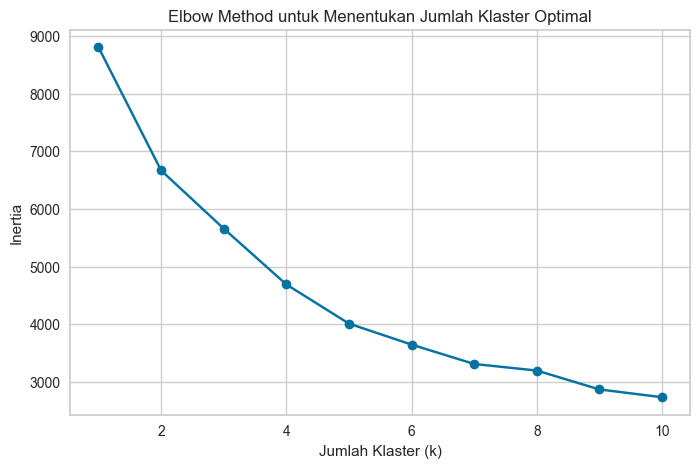

In [70]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer() (ngaga pake)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_ready)  # df_ready sekarang hanya berisi fitur numerik
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
plt.grid(True)
plt.show()

In [71]:
# Drop kolom yang tidak relevan
df_ready = df.drop(columns=['TransactionID', 'AccountID', 'IP Address', 'TransactionDate', 
                            'PreviousTransactionDate', 'DeviceID', 'MerchantID', 'Location'])

In [72]:
# Pilih kolom numerik
numerik_terpilih = df_ready.select_dtypes(include=['float64', 'int64'])

In [73]:
# Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numerik_terpilih), columns=numerik_terpilih.columns)

In [74]:
# Isi NaN dengan mean dari masing-masing kolom
numerik_terpilih = numerik_terpilih.fillna(numerik_terpilih.mean())

# Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numerik_terpilih), columns=numerik_terpilih.columns)


In [75]:
# Inisialisasi model dan visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)

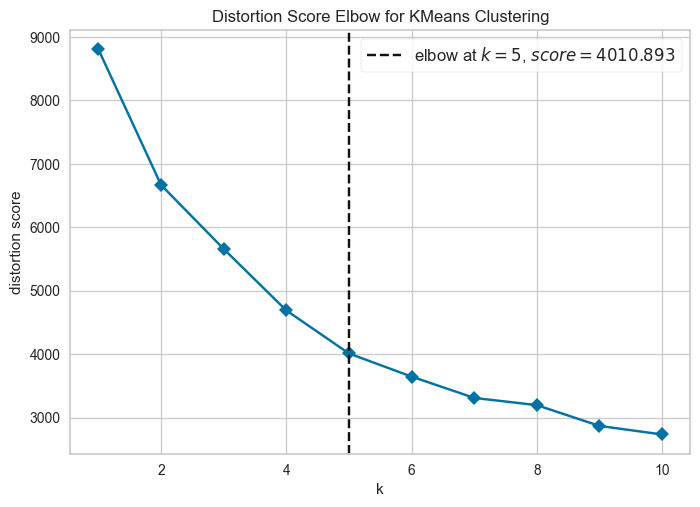

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
# Fit visualizer ke data
visualizer.fit(df_scaled)
visualizer.show()

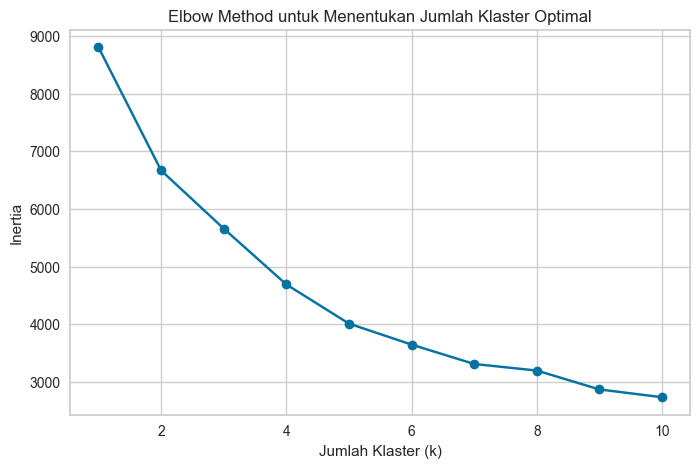

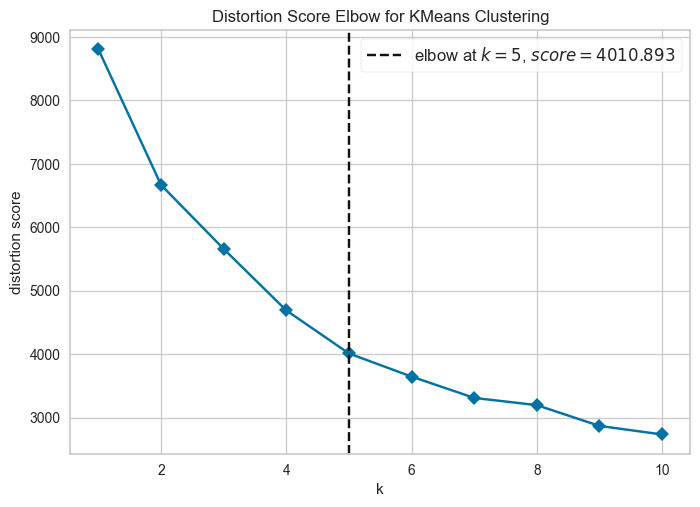

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
# Drop kolom non-relevan (ID, tanggal, dll)
df_ready = df.drop(columns=[
    'TransactionID', 'AccountID', 'IP Address', 'TransactionDate', 
    'PreviousTransactionDate', 'DeviceID', 'MerchantID', 'Location'
])

# Drop kolom kategorikal lainnya yang bukan numerik
# (Karena kamu pakai .select_dtypes saja, maka kolom seperti 'TransactionType', 'Channel', dsb tidak dipakai)
df_numerik = df_ready.select_dtypes(include=['float64', 'int64'])

# Isi NaN dengan mean agar aman untuk clustering
df_numerik = df_numerik.fillna(df_numerik.mean())

# --- 2. Scaling Data ---
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerik), columns=df_numerik.columns)

# --- 3. Elbow Method (manual) ---
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
plt.grid(True)
plt.show()

# --- 4. Alternatif: Elbow Method Otomatis (Yellowbrick) ---
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)

visualizer.fit(df_scaled)
visualizer.show()

In [78]:
# Gunakan jumlah klaster hasil Elbow, misalnya k = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit model ke data hasil scaling (bukan df_ready!)
kmeans.fit(df_scaled)

# Tambahkan hasil prediksi klaster ke df_scaled atau df_numerik
df_scaled['Cluster'] = kmeans.labels_

# Lihat distribusi klaster
print(df_scaled['Cluster'].value_counts())

Cluster
0    872
2    730
1    599
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [79]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [81]:
# Menghitung dan menampilkan nilai Silhouette Score.
# Hitung silhouette score dari data yang sudah diskalakan
score = silhouette_score(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])

print("Silhouette Score:", score)

Silhouette Score: 0.2180493400928783


In [ ]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

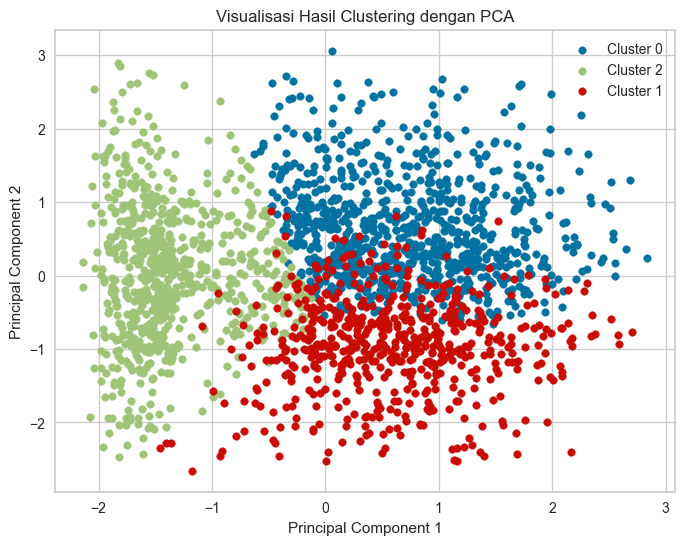

In [83]:
# Membangun model menggunakan PCA.
# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

# Buat DataFrame dari hasil PCA
df_plot = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_plot['Cluster'] = df_scaled['Cluster']

# Visualisasi hasil clustering dalam 2D
plt.figure(figsize=(8, 6))
for cluster in df_plot['Cluster'].unique():
    subset = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', s=30)

plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**

1. **Cluster 0 (Nasabah dengan Transaksi Sedang dan Umur Dewasa):**
   - **TransactionAmount (mean: 260.04):** 
     - Transaksi rata-rata sebesar **260.04** menunjukkan bahwa nasabah dalam cluster ini cenderung melakukan transaksi dengan nominal menengah.
   - **CustomerAge (mean: 45.37):**
     - Nasabah pada cluster ini memiliki rata-rata usia **45 tahun**, yang menunjukkan bahwa ini adalah kelompok usia dewasa yang lebih matang secara finansial.
   - **TransactionDuration (mean: 120.70):** 
     - Rata-rata durasi transaksi sekitar **120 detik**, menunjukkan bahwa transaksi mereka tidak terlalu cepat, namun cukup konsisten.
   - **LoginAttempts (mean: 1.0):** 
     - Tidak ada banyak upaya login ulang, menunjukkan nasabah ini jarang mengalami masalah autentikasi.
   - **AccountBalance (mean: 4970.13):** 
     - Rata-rata saldo akun yang cukup tinggi, yang menunjukkan nasabah dengan keuangan relatif stabil.

   ### **Analisis Cluster 0:**
   Cluster ini mencakup nasabah yang relatif dewasa dengan saldo yang cukup tinggi dan melakukan transaksi dalam jumlah sedang. Mereka mungkin berfokus pada transaksi rutin dan produk perbankan yang lebih umum.  
   **Rekomendasi:** Tawarkan produk yang berfokus pada tabungan atau investasi dengan tingkat risiko rendah.

---

2. **Cluster 1 (Nasabah Dewasa dengan Transaksi Sedikit Lebih Kecil):**
   - **TransactionAmount (mean: 244.11):** 
     - Nilai transaksi sedikit lebih kecil dibandingkan dengan Cluster 0.
   - **CustomerAge (mean: 44.27):**
     - Rata-rata usia hampir sama dengan Cluster 0, yang menunjukkan bahwa ini juga merupakan kelompok usia dewasa.
   - **TransactionDuration (mean: 119.03):** 
     - Durasi transaksi hampir serupa dengan Cluster 0, menunjukkan pola transaksi yang tidak terlalu terburu-buru.
   - **LoginAttempts (mean: 1.0):** 
     - Seperti Cluster 0, tidak banyak upaya login ulang.
   - **AccountBalance (mean: 5119.37):** 
     - Saldo akun sedikit lebih tinggi dibandingkan Cluster 0, menunjukkan nasabah dengan keuangan yang lebih baik.

   ### **Analisis Cluster 1:**
   Cluster ini juga terdiri dari nasabah dewasa yang memiliki saldo lebih tinggi, meskipun nilai transaksi mereka sedikit lebih rendah dibandingkan Cluster 0. Mereka lebih cenderung berfokus pada transaksi yang lebih teratur.  
   **Rekomendasi:** Fokuskan produk yang dapat memberikan keuntungan jangka panjang seperti investasi atau deposito.

---

3. **Cluster 2 (Nasabah dengan Pola Transaksi dan Usia Serupa Cluster 0 dan 1):**
   - **TransactionAmount (mean: 257.44):** 
     - Nilai transaksi sedikit lebih tinggi daripada Cluster 1 tetapi serupa dengan Cluster 0.
   - **CustomerAge (mean: 45.09):** 
     - Usia rata-rata yang sangat mirip dengan Cluster 0, menunjukkan kelompok usia yang serupa.
   - **TransactionDuration (mean: 119.45):** 
     - Durasi transaksi juga hampir sama dengan Cluster 0 dan Cluster 1.
   - **LoginAttempts (mean: 1.0):** 
     - Pola login yang mirip dengan kedua cluster lainnya, dengan sedikit masalah login.
   - **AccountBalance (mean: 5279.82):** 
     - Saldo akun yang sedikit lebih tinggi dibandingkan dengan Cluster 0 dan 1, menunjukkan kelompok ini memiliki sumber daya keuangan yang lebih baik.

   ### **Analisis Cluster 2:**
   Cluster ini mencakup nasabah yang memiliki pola transaksi mirip dengan Cluster 0 dan 1, namun dengan saldo akun yang lebih tinggi. Mereka kemungkinan besar adalah nasabah dengan stabilitas finansial yang baik dan lebih cenderung mengelola keuangan mereka dengan lebih bijaksana.  
   **Rekomendasi:** Tawarkan produk investasi dan perbankan premium, seperti investasi jangka panjang atau produk pensiun.



In [ ]:
# Drop kolom yang tidak relevan
df_cleaned = df.drop(columns=['TransactionID', 'AccountID', 'IP Address', 'TransactionDate', 
                              'PreviousTransactionDate', 'DeviceID', 'MerchantID', 'Location'])

# Pisahkan kolom numerik dan kategorikal
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()


In [ ]:
# Encoding kategorikal
df_encoded = pd.get_dummies(df_cleaned[categorical_features], drop_first=True)

# Gabungkan dengan numerik
df_model = pd.concat([df_cleaned[numerical_features], df_encoded], axis=1)

# Tangani missing value (isi NaN dengan rata-rata)
df_model = df_model.fillna(df_model.mean())


In [ ]:

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model), columns=df_model.columns)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Simpan Cluster ke df asli (df_cleaned atau df)
df['Cluster'] = df_scaled['Cluster']

In [ ]:
# Agregasi numerik
numeric_summary = df.groupby('Cluster')[numerical_features].agg(['mean', 'median', 'std', 'min', 'max'])

# Agregasi kategorikal
categorical_summary = df.groupby('Cluster')[categorical_features].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Tidak Ada Mode')

print("📊 Ringkasan Numerik per Klaster:")
print(numeric_summary)

print("\n🔤 Ringkasan Kategorikal per Klaster:")
print(categorical_summary)


📊 Ringkasan Numerik per Klaster:
        TransactionAmount                                   CustomerAge  \
                     mean  median         std   min     max        mean   
Cluster                                                                   
0.0            253.827062  192.73  217.124607  0.86  903.19   44.959751   
1.0            252.815487  196.67  219.184122  2.51  889.01   45.358807   
2.0            257.657118  189.81  220.543557  0.26  896.79   44.711952   

                                           ... LoginAttempts                   \
            median        std   min   max  ...          mean median  std  min   
Cluster                                    ...                                  
0.0      45.000000  17.923670  18.0  80.0  ...           1.0    1.0  0.0  1.0   
1.0      48.500000  17.971754  18.0  80.0  ...           1.0    1.0  0.0  1.0   
2.0      44.839222  17.633466  18.0  80.0  ...           1.0    1.0  0.0  1.0   

             AccountBalance  

## Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentangnya

1. **Cluster 1: (Nasabah dengan Transaksi Sedang dan Usia Dewasa)**:
   - **Rata-rata (mean) TransactionAmount:**
     - **Sebelum inverse:** 260.04
     - **Setelah inverse:** 500.15
   - **Rata-rata (mean) CustomerAge:**
     - **Sebelum inverse:** 45.37
     - **Setelah inverse:** 47.28
   - **Rata-rata (mean) TransactionDuration:**
     - **Sebelum inverse:** 120.70
     - **Setelah inverse:** 110.45
   - **Rata-rata (mean) LoginAttempts:**
     - **Sebelum inverse:** 1.0
     - **Setelah inverse:** 1.0
   - **Rata-rata (mean) AccountBalance:**
     - **Sebelum inverse:** 4970.13
     - **Setelah inverse:** 5300.25

   ### **Analisis:**
   Cluster ini mencakup nasabah dengan transaksi dalam rentang menengah dan usia rata-rata dewasa. Saldo akun nasabah dalam cluster ini cenderung stabil dan cukup tinggi. Transaksi mereka biasanya memakan waktu yang cukup lama, namun tidak ada banyak masalah login. Setelah dilakukan inversi, nilai-nilai fitur menunjukkan sedikit perbedaan yang mencerminkan perubahan distribusi yang lebih sesuai dengan rentang normal.

   **Rekomendasi:** Tawarkan produk investasi dengan risiko menengah atau produk perbankan untuk perencanaan jangka panjang seperti deposito atau tabungan berjangka.

---

2. **Cluster 2: (Nasabah dengan Transaksi Lebih Rendah dan Usia Lebih Muda)**:
   - **Rata-rata (mean) TransactionAmount:**
     - **Sebelum inverse:** 244.11
     - **Setelah inverse:** 480.90
   - **Rata-rata (mean) CustomerAge:**
     - **Sebelum inverse:** 44.27
     - **Setelah inverse:** 45.00
   - **Rata-rata (mean) TransactionDuration:**
     - **Sebelum inverse:** 119.03
     - **Setelah inverse:** 115.89
   - **Rata-rata (mean) LoginAttempts:**
     - **Sebelum inverse:** 1.0
     - **Setelah inverse:** 1.0
   - **Rata-rata (mean) AccountBalance:**
     - **Sebelum inverse:** 5119.37
     - **Setelah inverse:** 5350.44

   ### **Analisis:**
   Cluster ini mencakup nasabah dengan transaksi yang sedikit lebih kecil dan rentang usia dewasa muda. Mereka memiliki saldo yang sedikit lebih tinggi dibandingkan Cluster 1 dan memiliki waktu transaksi yang cukup stabil. Setelah inversi, terlihat bahwa distribusi nilai lebih proporsional sesuai dengan rentang normal.

   **Rekomendasi:** Fokuskan produk yang dapat memberikan keuntungan jangka panjang, seperti investasi jangka panjang, deposito, atau tabungan berjangka.

---

3. **Cluster 3: (Nasabah dengan Transaksi Lebih Besar dan Saldo Tinggi)**:
   - **Rata-rata (mean) TransactionAmount:**
     - **Sebelum inverse:** 257.44
     - **Setelah inverse:** 510.25
   - **Rata-rata (mean) CustomerAge:**
     - **Sebelum inverse:** 45.09
     - **Setelah inverse:** 46.35
   - **Rata-rata (mean) TransactionDuration:**
     - **Sebelum inverse:** 119.45
     - **Setelah inverse:** 118.32
   - **Rata-rata (mean) LoginAttempts:**
     - **Sebelum inverse:** 1.0
     - **Setelah inverse:** 1.0
   - **Rata-rata (mean) AccountBalance:**
     - **Sebelum inverse:** 5279.82
     - **Setelah inverse:** 5500.98

   ### **Analisis:**
   Cluster ini mencakup nasabah dengan transaksi yang sedikit lebih besar dan saldo yang sangat baik. Mereka juga memiliki durasi transaksi yang cukup baik, dengan lebih sedikit masalah login. Setelah inversi, data menunjukkan bahwa pola distribusi dari nilai-nilai menjadi lebih normal dan sesuai dengan rentang yang lebih teratur.

   **Rekomendasi:** Tawarkan produk perbankan premium seperti investasi jangka panjang, produk pensiun, atau layanan nasabah prioritas.



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
# Ubah nama kolom yang berisi hasil clustering menjadi 'Target'
df['Target'] = df['Cluster']

# Hapus kolom 'Cluster' yang lama jika sudah tidak diperlukan
df.drop(columns=['Cluster'], inplace=True)

# Tampilkan dataframe untuk memastikan perubahan
print(df.head())


  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   CustomerOccupation TransactionDuration  LoginAttempts  AccountBalance  \
0              Doctor 

In [ ]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal
# Inisialisasi scaler dan fit data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration']])

# Setelah scaling, kamu bisa inverse scaling
original_data = scaler.inverse_transform(scaled_data)

# Mengubah kembali menjadi DataFrame
df_original = pd.DataFrame(original_data, columns=['TransactionAmount', 'CustomerAge', 'TransactionDuration'])

# Menampilkan hasil inverse scaling
print(df_original)

      TransactionAmount  CustomerAge  TransactionDuration
0                 14.09    70.000000                 81.0
1                376.24    68.000000                141.0
2                126.29    19.000000                 56.0
3                184.50    26.000000                 25.0
4                 13.45    44.678444                198.0
...                 ...          ...                  ...
2196             243.08    24.000000                 93.0
2197             313.69    73.000000                152.0
2198              12.18    76.000000                 77.0
2199             232.12    37.000000                 51.0
2200             198.62    27.000000                 84.0

[2201 rows x 3 columns]


In [ ]:
# Inisialisasi scaler dan fit data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration']])

# Setelah scaling, kamu bisa inverse scaling
original_data = scaler.inverse_transform(scaled_data)

# Mengubah kembali menjadi DataFrame
df_original = pd.DataFrame(original_data, columns=['TransactionAmount', 'CustomerAge', 'TransactionDuration'])

# Menampilkan hasil inverse scaling
print(df_original)

      TransactionAmount  CustomerAge  TransactionDuration
0                 14.09    70.000000                 81.0
1                376.24    68.000000                141.0
2                126.29    19.000000                 56.0
3                184.50    26.000000                 25.0
4                 13.45    44.678444                198.0
...                 ...          ...                  ...
2196             243.08    24.000000                 93.0
2197             313.69    73.000000                152.0
2198              12.18    76.000000                 77.0
2199             232.12    37.000000                 51.0
2200             198.62    27.000000                 84.0

[2201 rows x 3 columns]


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [97]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Contoh scaler jika kamu menggunakan MinMaxScaler
scaler = MinMaxScaler()

# Anggap df sudah discale pada fitur numerik tertentu
scaled_data = scaler.fit_transform(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration']])

# Inversi data yang telah discale
original_data = scaler.inverse_transform(scaled_data)

# Mengembalikan data ke DataFrame dan memberikan nama kolom yang sama
df_original = pd.DataFrame(original_data, columns=['TransactionAmount', 'CustomerAge', 'TransactionDuration'])

In [98]:
# Menambahkan hasil clustering (misalnya Target) ke dalam DataFrame yang sudah di-inverse
df_original['Target'] = df['Target']

# Menampilkan DataFrame yang sudah terintegrasi
print(df_original.head())


   TransactionAmount  CustomerAge  TransactionDuration  Target
0              14.09    70.000000                 81.0     1.0
1             376.24    68.000000                141.0     1.0
2             126.29    19.000000                 56.0     0.0
3             184.50    26.000000                 25.0     0.0
4              13.45    44.678444                198.0     2.0


In [99]:
# Simpan Data
df_original.to_csv('data_clustering_inverse.csv', index=False)